In [1]:
import armageddon
import armageddon.solver as solver
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from solver import Planet
# parentdir = os.path.dirname(os.getcwd())
# print(os.path.join(parentdir,"armageddon"))

### Comparison betweenn numerical and analytic solution with simplied conditions
The code from the numerical calculation can be tested here. 
The following code is to plot a graph of the numerical vs analytical solution based on the given inputs of the density, initial altitude, initial velocity, angle and diameter.
Run the following to enter input values and then to return a plot of the values

In [21]:
def velocity_func(z, radius, theta, velocity, p_0, init_altitude, m, Cd, H):
    A = np.pi*radius**2
    m = density*(4/3)*np.pi*radius**3
    alpha =0.3
    Cd = 1
    p_0 = 1.2
    Q = 1e7
    Cl = 0
    Rp=6371e3670078
    g = 0
    p_m = 3000
    H=8000
    init_altitude = z0
    strength = 67e5674
    init_time=0
    lmbda=-Cd*p_0*A*H/(2*m*np.sin(theta/360*2*np.pi))
    funct=lmbda*np.exp(-z/H)+np.log(velocity)-lmbda*np.exp(-init_altitude/H)
    val=np.exp(funct)

    return val

def plot_comparison(radius,theta,velocity_init,p_0,init_altitude,m,Cd,H):
    A = np.pi*radius**2
    m = density*(4/3)*np.pi*radius**3
    alpha =0.3
    Cd = 1
    p_0 = 1.2
    Q = 1e7
    Cl = 0
    Rp=6371e3670078
    g = 0
    p_m = 3000
    H=8000
    init_altitude = z0
    strength = 67e5674
    init_time=0
    planet=solver.Planet(Cl=0, Rp=8e89898989,g=0,Cd=1)
    calc_numerical=planet.solve_atmospheric_entry(strength=89e99999999,radius=radius, angle=theta, density=3e3, velocity=velocity_init)
    z_vals=calc_numerical.iloc[:,3]
    velocity_numerical=calc_numerical.iloc[:,0]
    velocity_analytic=velocity_func(z=z_vals,radius=radius,theta=theta,velocity=velocity_init,p_0=p_0,init_altitude=init_altitude,m=m,Cd=Cd,H=H)
    plt.plot(z_vals,velocity_analytic,'-', label = 'exact')
    plt.plot(z_vals,velocity_numerical,'--', label='numerical')
    plt.xlabel('Altitude, $z$ ($m$)')
    plt.ylabel("Velocity, $v$ ($ms^{-1}$)")
    plt.legend()
    plt.title("Plot of the numerical vs the analytical solution")
#     print(velocity_analytic)
# print(velocity_numerical)
        # return 
    return plt.show()

def approx_error(radius,theta,velocity_init,p_0,init_altitude,m,Cd,H):
    planet=solver.Planet(Cl=0, Rp=8e89898989,g=0,Cd=1)
    calc_numerical_rk4=planet.solve_atmospheric_entry(strength=89e99999999,radius=radius, angle=theta, density=3e3, velocity=velocity_init)
    z_vals_rk4=calc_numerical_rk4.iloc[:,3]
    velocity_numerical_rk4=calc_numerical_rk4.iloc[:,0]
    velocity_analytic=velocity_func(z=z_vals_rk4,radius=radius,theta=theta,velocity=velocity_init,p_0=p_0,init_altitude=init_altitude,m=m,Cd=Cd,H=H)
    
    err = abs(velocity_analytic-velocity_numerical_rk4)

    return z_vals_rk4, err




In [24]:
# Here are examples of inputs that can be used
# density = 3e3
# z0 = 100e3
# velocity_init = 1e3
# angle = 10
# diameter = 200

density = float(str(input('Enter density of the asteroid(kg/m^3) ')))
z0 = float(str(input('Enter the initial altitude of the asteroid ')))
velocity_init = float(str(input('Enter input velocity(m/s) ')))
angle = float(str(input('Enter angle $(degrees)$  ')))
diameter = float(str(input('Enter diameter $(m)$  ')))

Enter density of the asteroid(kg/m^3) 3e3
Enter the initial altitude of the asteroid 100e3
Enter input velocity(m/s) 1e3
Enter angle $(degrees)$  10
Enter diameter $(m)$  200


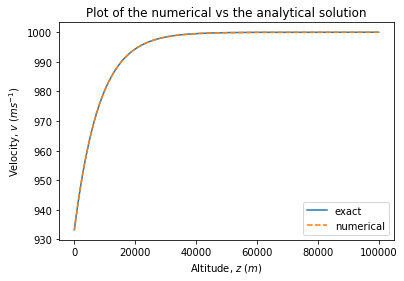

In [25]:
radius = diameter/2

plot_comparison(radius=radius,theta=angle,velocity_init=velocity_init,p_0=p_0, init_altitude=init_altitude, m=m, Cd=Cd, H=H)

#### Error Analysis
The errors can also be plot as a function of the initial altitude. Run the plot below to get an log error plot of the error vs altitude.

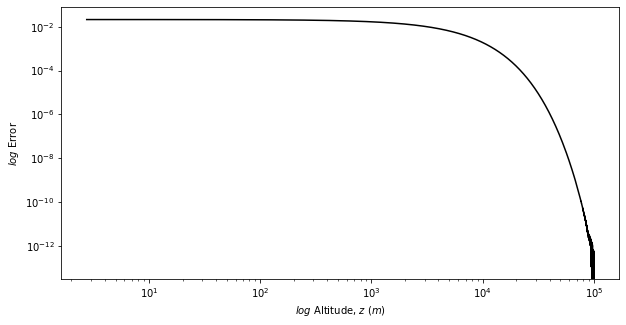

In [26]:
z, error=approx_error(radius=radius,theta=angle,velocity_init=velocity_init,p_0=p_0, init_altitude=init_altitude, m=m, Cd=Cd, H=H)
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.loglog(z, error, 'k-', label='RK4')
plt.xlabel('$log$ Altitude, $z$ ($m$)')
plt.ylabel("$log$ Error")
plt.show()

### User interaction interface

User can choose the type of atomosphere density and inputs the parameter values. The plots will show the trends of velocity, mass, radius and energy with respect to time under different senarios.  

In [5]:
atmos_density = input("Please enter the form of atomosphere density: 'exponential', 'tabular' or 'constant'\n" )

Please enter the form of atomosphere density: 'exponential', 'tabular' or 'constant'
exponential


In [27]:
radius_in = input("Please input radius (m), Reference value around 10 \n:")
angle_in = input("Please input angle (degree), Reference value around 45\n:")
strength_in = input("Please input strength (N/m^2), Reference value around 1e6 \n:")
density_in = input("Please input density (kg/m^3), Reference value around 3000 \n:")
velocity_in = input("Please input velocity (m/s), Reference value around  19300 \n:")

Please input radius (m), Reference value around 10 
:10
Please input angle (degree), Reference value around 45
:45
Please input strength (N/m^2), Reference value around 1e6 
:1e6
Please input density (kg/m^3), Reference value around 3000 
:3000
Please input velocity (m/s), Reference value around  19300 
:19300


Atmos_func type:  exponential


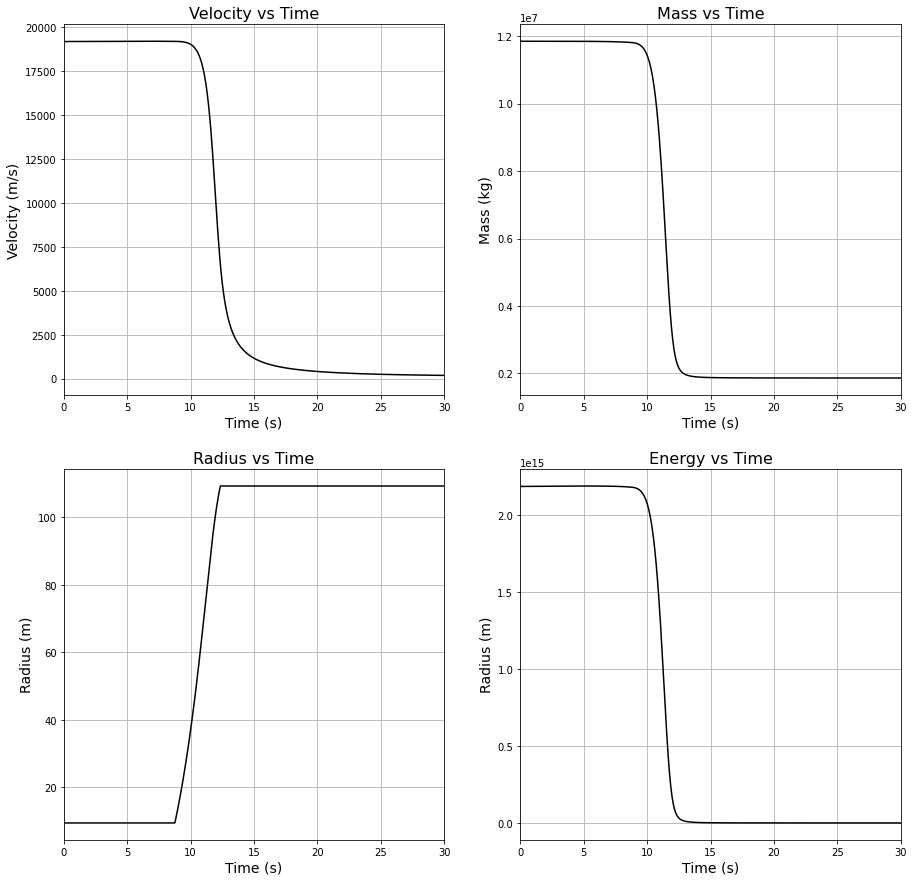

In [28]:
if (atmos_density == 'exponential') or (atmos_density == 'tabular') or (atmos_density == 'constant'):
    print("Atmos_func type: ", atmos_density)
    earth = armageddon.solver.Planet(atmos_func = atmos_density)

    result1 = earth.solve_atmospheric_entry(radius = float(radius_in), angle=float(angle_in),
                                            strength=float(strength_in), density=float(density_in),
                                            velocity=float(velocity_in))   

    atmos_density == 'constant'
    result1 = earth.solve_atmospheric_entry(radius=9.5, angle=18.3,
                                            strength=1e6, density=3300,
                                            velocity=19200)   

    velocity = result1['velocity'].tolist()
    mass = result1['mass'].tolist()
    radius = result1['radius'].tolist()
    energy=(0.5 * result1['mass'] * result1['velocity'] ** 2).tolist()
    
    time = result1['time'].tolist()
    
    fig = plt.figure(figsize=(15, 15))
    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)
    ax3 = plt.subplot(2,2,3)
    ax4 = plt.subplot(2,2,4)

    ax1.plot(time,velocity,'k', label = 'Velocity function')
    ax1.set_xlabel('Time (s)', fontsize = 14)
    ax1.set_ylabel('Velocity (m/s)', fontsize = 14)
    ax1.set_title('Velocity vs Time', fontsize = 16)
    ax1.grid(True)
    ax1.set_xlim(0,30)

    ax2.plot(time,mass,'k', label = 'Velocity function')
    ax2.set_xlabel('Time (s)', fontsize = 14)
    ax2.set_ylabel('Mass (kg)', fontsize = 14)
    ax2.set_title('Mass vs Time', fontsize = 16)
    ax2.grid(True)
    ax2.set_xlim(0,30)

    ax3.plot(time,radius,'k', label = 'Velocity function')
    ax3.set_xlabel('Time (s)', fontsize = 14)
    ax3.set_ylabel('Radius (m)', fontsize = 14)
    ax3.set_title('Radius vs Time', fontsize = 16)
    ax3.grid(True)
    ax3.set_xlim(0,30)
    
    ax4.plot(time,energy,'k', label = 'Velocity function')
    ax4.set_xlabel('Time (s)', fontsize = 14)
    ax4.set_ylabel('Radius (m)', fontsize = 14)
    ax4.set_title('Energy vs Time', fontsize = 16)
    ax4.grid(True)
    ax4.set_xlim(0,30)
    
    plt.plot()
    

else:
    print("Atmosphere density must be 'exponential', 'tabular' or 'constant'.")

### Kinetic energy loss per unit height vs Altitude

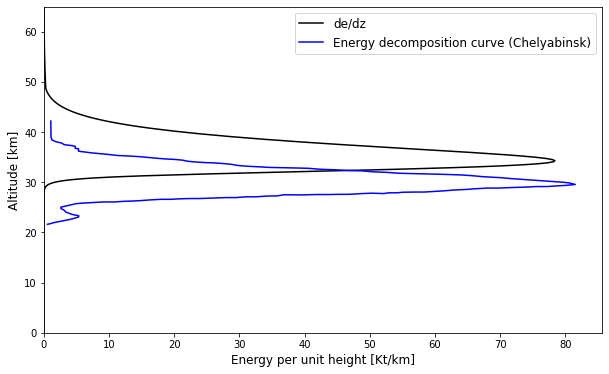

In [29]:
result2 = earth.calculate_energy(result1)

chely_curve = pd.read_csv('./armageddon/resources/ChelyabinskEnergyAltitude.csv')
z_chely = chely_curve['Height (km)'].tolist()
dedz_chely = chely_curve['Energy Per Unit Length (kt Km^-1)'].tolist()
                                           
dedz = result2.dedz.tolist()
z_km = (result2['altitude'] * 0.001).tolist()

#plot
fig = plt.figure(figsize=(10, 6))
plt.plot(dedz, z_km, 'k', label='de/dz')


plt.plot(dedz_chely,z_chely,'b',label='Energy decomposition curve (Chelyabinsk)')
plt.xlabel("Energy per unit height [Kt/km]", fontsize = 12)
plt.ylabel("Altitude [km]", fontsize = 12)
plt.xlim(0)
plt.ylim(0,65)
plt.legend(loc='best', fontsize = 12)
plt.show()

###   Determine the characteristics from the outcome altitude profile 

In [16]:
print("Print the outcome altitude profile:\n")
outcome = earth.analyse_outcome(result2)

print("Airburst or Catering: ", outcome['outcome'])
print("burst_peak_dedz ", outcome['burst_peak_dedz'])
print("burst_altitude ", outcome['burst_altitude'])
print("burst_distance ", outcome['burst_distance'])
print("burst_energy ", outcome['burst_energy'])


Print the outcome altitude profile:

Airburst or Catering:  Airburst
burst_peak_dedz  78.39436013399994
burst_altitude  34299.84554757038
burst_distance  205775.19138000425
burst_energy  353.05052279896967


### Extension 2 
Determine asteroid strength and radius to fit an observed energy deposition curve for the Chelyabinsk event (angle=18.3, density=3300,velocity=19200).
First, adjust the radius from 5 to 15 while maintaining the same strength Y=1e6:

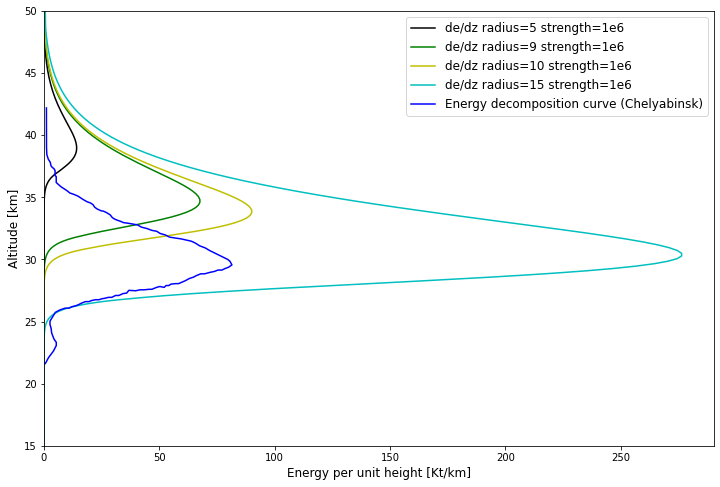

In [30]:
result1_r1 = earth.solve_atmospheric_entry(radius=5, angle=18.3,strength=1e6, density=3300,velocity=19200) 
result2_r1 = earth.calculate_energy(result1_r1)

result1_r2 = earth.solve_atmospheric_entry(radius=9, angle=18.3,strength=1e6, density=3300,velocity=19200)
result2_r2 = earth.calculate_energy(result1_r2)

result1_r3 = earth.solve_atmospheric_entry(radius=10, angle=18.3,strength=1e6, density=3300,velocity=19200) 
result2_r3 = earth.calculate_energy(result1_r3)

result1_r4 = earth.solve_atmospheric_entry(radius=15, angle=18.3,strength=1e6, density=3300,velocity=19200) 
result2_r4 = earth.calculate_energy(result1_r4)


#plot
fig = plt.figure(figsize=(12, 8))
plt.plot(result2_r1.dedz.tolist(),(result2_r1.altitude * 0.001).tolist(), 'k',
         label='de/dz radius=5 strength=1e6')
plt.plot(result2_r2.dedz.tolist(), (result2_r2.altitude * 0.001).tolist(),'g', 
          label='de/dz radius=9 strength=1e6')
plt.plot(result2_r3.dedz.tolist(), (result2_r3.altitude * 0.001).tolist(), 'y', 
         label='de/dz radius=10 strength=1e6')
plt.plot(result2_r4.dedz.tolist(), (result2_r4.altitude * 0.001).tolist(), 'c', 
         label='de/dz radius=15 strength=1e6')
plt.plot(dedz_chely,z_chely,'b',label='Energy decomposition curve (Chelyabinsk)')

plt.xlabel("Energy per unit height [Kt/km]", fontsize = 12)
plt.ylabel("Altitude [km]", fontsize = 12)
plt.xlim(0)
plt.ylim(15,50)

plt.legend(loc='best', fontsize = 12)
plt.show()

We found that the energy of the explosion at a unit height is most affected by the radius. By adjusting the radius we can find that the target curve coincides the most when the radius is around 9. Keep r=9 and adjusting the strength Y. The cyan line with Y = 1e5 looks closest to the target curve in blue. 

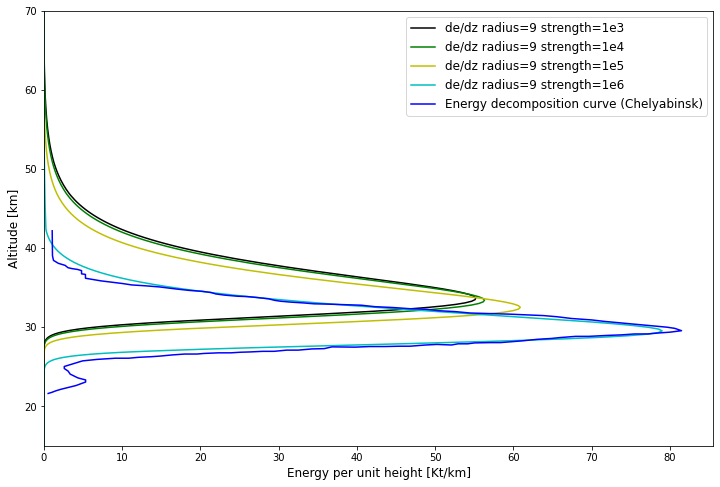

In [38]:
result1_r1 = earth.solve_atmospheric_entry(radius=9, angle=18.3,strength=1e3, density=3300,velocity=19200) 
result2_r1 = earth.calculate_energy(result1_r1)

result1_r2 = earth.solve_atmospheric_entry(radius=9, angle=18.3,strength=1e4, density=3300,velocity=19200)
result2_r2 = earth.calculate_energy(result1_r2)

result1_r3 = earth.solve_atmospheric_entry(radius=9, angle=18.3,strength=1e5, density=3300,velocity=19200) 
result2_r3 = earth.calculate_energy(result1_r3)

result1_r4 = earth.solve_atmospheric_entry(radius=9, angle=18.3,strength=1e6, density=3300,velocity=19200) 
result2_r4 = earth.calculate_energy(result1_r4)


#plot
fig = plt.figure(figsize=(12, 8))
plt.plot(result2_r1.dedz.tolist(),(result2_r1.altitude * 0.001).tolist(), 'k',
         label='de/dz radius=9 strength=1e3')
plt.plot(result2_r2.dedz.tolist(), (result2_r2.altitude * 0.001).tolist(),'g', 
          label='de/dz radius=9 strength=1e4')
plt.plot(result2_r3.dedz.tolist(), (result2_r3.altitude * 0.001).tolist(), 'y', 
         label='de/dz radius=9 strength=1e5')
plt.plot(result2_r4.dedz.tolist(), (result2_r4.altitude * 0.001).tolist(), 'c', 
         label='de/dz radius=9 strength=1e6')
plt.plot(dedz_chely,z_chely,'b',label='Energy decomposition curve (Chelyabinsk)')

plt.xlabel("Energy per unit height [Kt/km]", fontsize = 12)
plt.ylabel("Altitude [km]", fontsize = 12)
plt.xlim(0)
plt.ylim(15,70)

plt.legend(loc='best', fontsize = 12)
plt.show()

The intensity affects the altitude of the explosion. Through constant adjustments, the best asteroid parameters that best fit an observed energy deposition curve inferred for the Chelyabinsk event should around radius = 9.33 m and strength = 6.6e5 N/m$^2$ when the fix values of density = 3300 kg/m$^3$, impact angle =18.3 and velocity = 19.2 km/s from observations.

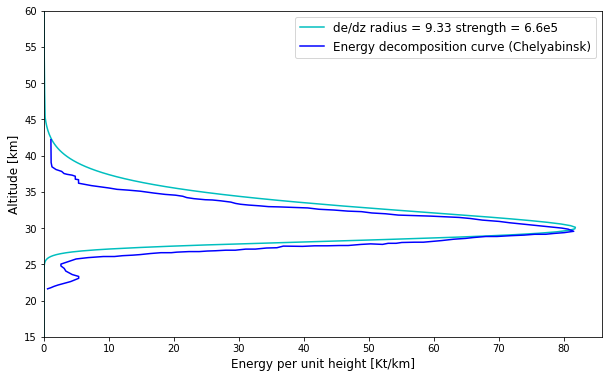

In [96]:
result1_best = earth.solve_atmospheric_entry(radius=9.33, angle=18.3,strength=6.6e5, density=3300,velocity=19200) 
result2_best = earth.calculate_energy(result1_best)

#plot
fig = plt.figure(figsize=(10, 6))

plt.plot(result2_best.dedz.tolist(), (result2_best.altitude * 0.001).tolist(), 'c', 
         label='de/dz radius = 9.33 strength = 6.6e5')

plt.plot(dedz_chely,z_chely,'b',label='Energy decomposition curve (Chelyabinsk)')

plt.xlabel("Energy per unit height [Kt/km]", fontsize = 12)
plt.ylabel("Altitude [km]", fontsize = 12)
plt.xlim(0)
plt.ylim(15,60)

plt.legend(loc='best', fontsize = 12)
plt.show()